## Regression

Linear regression is one of the most widely known modeling techniques. Existing for more than 200 years, it has been explored from almost all possible angles. Linear regression assumes a linear relationship between the input variable (X) and the output variable (Y). It involves finding a linear equation for predicted value Y of the form:

$
\hat Y = W^T X + b
$

Where,

- $X = [x_1, x_2, ..., x_n]$ are the n input variables, and 
- $W = [w_1, w_2, ...w_n]$ are the linear coefficients, with 
- $b$ as the bias term. 

The bias term allows our regression model to provide 
an output even in the absence of any input; it provides us with an option to shift our data left or right to better fit the data. 

The error between the observed values (Y) and predicted values (Yhat) for an input sample i is:

$e_i = Y_i - \hat Y_i$

The goal is to find the best estimates for the coefficients $W$ and bias $b$, such that the error between the observed values $Y$ and the predicted values $ \hat Y$ is minimized. Let's go through some examples in order to better understand this.


## Simple linear regression

If we consider only one independent variable and one dependent variable, what we get is a simple linear regression. Consider the case of house price prediction, defined in the preceding section; the area of the house (A) is the independent variable and the price (Y) of the house is the dependent variable. We want to find a linear relationship between predicted price Yhat and A, of the form:

$
\hat Y = A @ W + b
$

Where b is the bias term. Thus, we need to determine W and b, such that the error between the price Y and predicted price Yhat is minimized. The standard method used to estimate W and b is called the method of least squares, that is, we try to minimize the sum of the square of errors (S). For the preceding case, the expression becomes:

$
S(W,b)= \sum_{i=1}^{N} (Y_i - \hat Y)^2
$

$
W= \frac
{\sum_{i=1}^{N}Y_i (A_i - \bar A)^2}
{\sum_{i=1}^{N}(A_i - \bar A)^2}
$

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

# Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))

In [2]:
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])

In [3]:
data.head()

,area,price
0,29.410131,760.253272
1,26.000393,679.009826
2,27.446845,738.171124
3,30.602233,817.055825
4,29.668895,791.722374


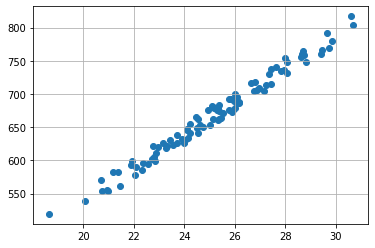

In [6]:
plt.scatter(data['area'], data['price'])
plt.grid(True)
plt.show()

In [7]:
W = sum(price*(area-np.mean(area))) / sum((area-np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)

In [8]:
print("The regression coefficients are", W,b)

The regression coefficients are 24.815544052284988 43.4989785533412


In [9]:
# predicted values
y_pred = W * area + b

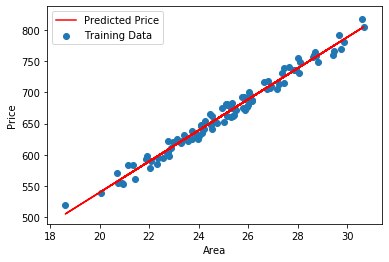

In [10]:
plt.plot(area, y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()